# Load the weather data dataframe

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("data-small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [24]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Load specific rows 

In [28]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Load specific coloumns

#### View the names of columns available in the dataframe

In [5]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

#### Load Single column

In [6]:
df['    DATE']

0       1860-01-01
1       1860-01-02
2       1860-01-03
3       1860-01-04
4       1860-01-05
           ...    
59316   2022-05-27
59317   2022-05-28
59318   2022-05-29
59319   2022-05-30
59320   2022-05-31
Name:     DATE, Length: 59321, dtype: datetime64[ns]

#### Load multiple columns 

In [7]:
df[[' SOUID','STAID','   TG',' Q_TG']]

,SOUID,STAID,TG,Q_TG
0,35381,1,21,0
1,35381,1,46,0
2,35381,1,31,0
3,35381,1,37,0
4,35381,1,31,0
...,...,...,...,...
59316,35381,1,-9999,9
59317,35381,1,-9999,9
59318,35381,1,-9999,9
59319,35381,1,-9999,9


# SIMPLE STATISTICS AND DATA FILTERING

## Load the data frame without cases where the '    TG' coloumn is equal to -9999

In [8]:
df.loc[df['   TG'] != -9999]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


## Calculate mean of the '   TG' column omitting the -9999 values 

In [10]:
df.loc[df['   TG'] != -9999]['   TG'].mean()

63.607875261284676

## Calculate the actual mean temperature (temperature values in the dataframe are 10x the actual value)

In [11]:
df.loc[df['   TG'] != -9999]['   TG'].mean() / 10

6.360787526128467

## Find out the maximum recorded temperature

In [12]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10

26.2

## Find out the minimum recorded temperature

In [13]:
df.loc[df['   TG'] != -9999]['   TG'].min() / 10

-28.8

## Create a histogram for the temperature values

<Axes: >

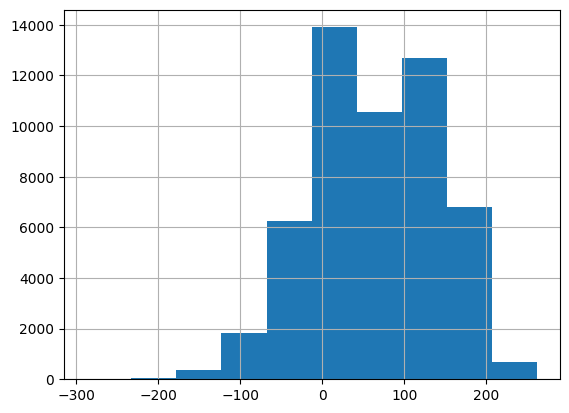

In [14]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

# Load a specific cell 

## Load the dataframe value for a specific date

In [15]:
df.loc[df['    DATE'] == "1860-01-02"]

,STAID,SOUID,DATE,TG,Q_TG
1,1,35381,1860-01-02,46,0


## Load only the temperature column as a series value

In [18]:
df.loc[df['    DATE'] == "1860-01-02"]['   TG']

1    46
Name:    TG, dtype: int64

## Access only the temperature value

In [19]:
df.loc[df['    DATE'] == "1860-01-02"]['   TG'].squeeze()

46

## Load the date for the day having maximum temperature

In [20]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

## Load the temperature value for the row with index 5

In [21]:
df.loc[5, '   TG']

16

# Calculate a new column out of an existing column

In [28]:
import numpy as np
df['TG0'] = df['   TG'].mask(df['   TG']==-9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG_CELCIUS,TG_FAHRENHEIT,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,-999.9,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,-999.9,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,-999.9,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,-999.9,-1767.82,NaN


In [29]:
df['TG_CELCIUS'] = df['TG0'] / 10

In [30]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG_CELCIUS,TG_FAHRENHEIT,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,-1767.82,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,-1767.82,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,-1767.82,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,-1767.82,NaN


In [31]:
df['TG_FAHRENHEIT'] = df['TG_CELCIUS'] * (9/5) + 32

In [32]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG_CELCIUS,TG_FAHRENHEIT,TG0
0,1,35381,1860-01-01,21,0,2.1,35.78,21.0
1,1,35381,1860-01-02,46,0,4.6,40.28,46.0
2,1,35381,1860-01-03,31,0,3.1,37.58,31.0
3,1,35381,1860-01-04,37,0,3.7,38.66,37.0
4,1,35381,1860-01-05,31,0,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,NaN,NaN,NaN
59317,1,35381,2022-05-28,-9999,9,NaN,NaN,NaN
59318,1,35381,2022-05-29,-9999,9,NaN,NaN,NaN
59319,1,35381,2022-05-30,-9999,9,NaN,NaN,NaN


# PLOTTING

<Axes: >

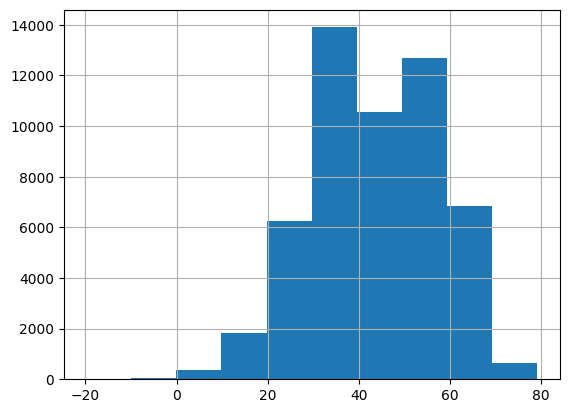

In [33]:
df['TG_FAHRENHEIT'].hist()

<Axes: xlabel='    DATE'>

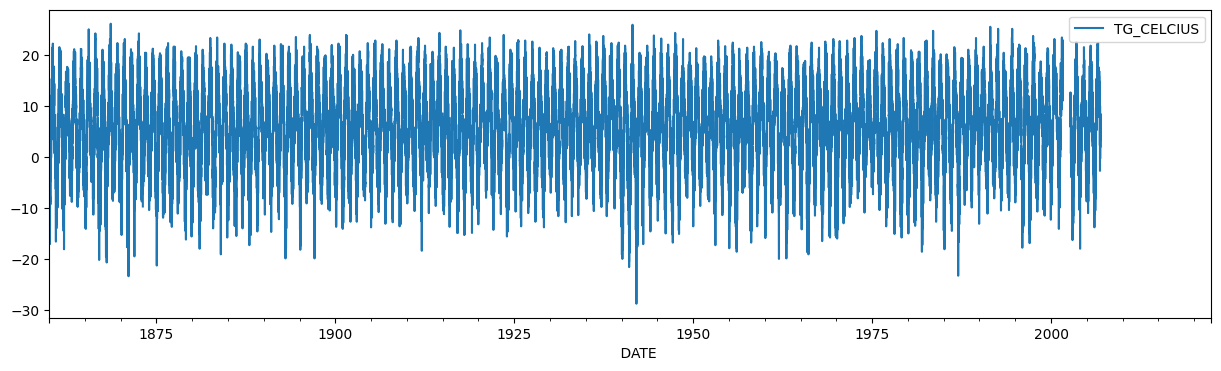

In [35]:
df.plot(x='    DATE',y='TG_CELCIUS',figsize=(15,4))

## Plot the data of specified rows only

<Axes: xlabel='    DATE'>

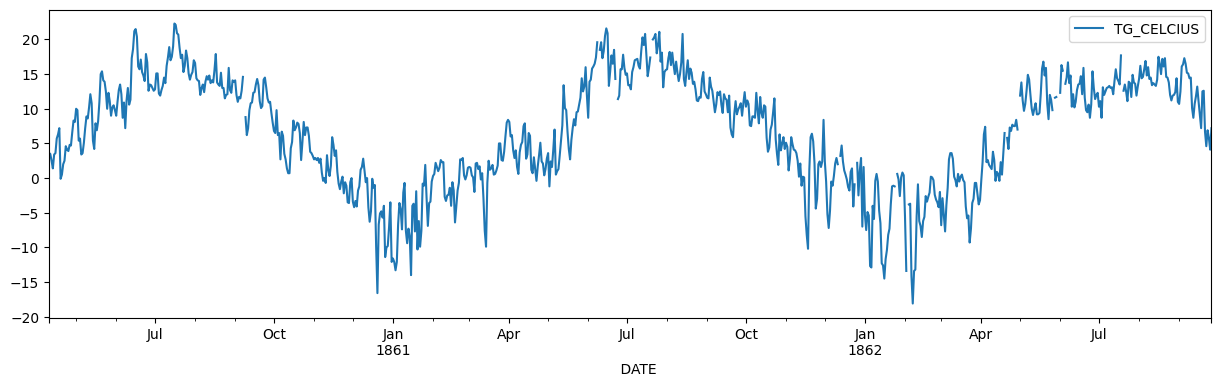

In [36]:
df[100:1000].plot(x='    DATE',y='TG_CELCIUS',figsize=(15,4))